### <center> Python Package Download Analysis </center>

- There are various machine learning packages that are pulled from pypi and conda-forage.
- We have collected the package download list using pypistats.
- To represent the number of downloads in millions, divide the total downloads of the packages by million.
- Visualizing the processed data using matplotlib and altair.

### Importing the required libraries for analysis

In [1]:
import pypistats
import pandas as pd

packages = ['numpy','scipy','pandas','spacy','sklearn','keras','tensorflow','torch','gensim','nltk','transformers',]

In [2]:
dfs = []
for p in packages:
    df = pypistats.overall(p, total=False, start_date="2021-08-01", format="pandas")
    df['package'] = p
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   3861 non-null   object
 1   date       3850 non-null   object
 2   percent    3850 non-null   object
 3   downloads  3861 non-null   int64 
 4   package    3861 non-null   object
dtypes: int64(1), object(4)
memory usage: 150.9+ KB


In [3]:
df = df.groupby("category").get_group("without_mirrors").sort_values("date").drop('category', axis=1)

In [4]:
df.head()

,date,percent,downloads,package
1396,2021-08-01,0.26%,58323,spacy
339,2021-08-01,0.39%,2000751,numpy
3115,2021-08-01,0.38%,254202,gensim
1006,2021-08-01,0.43%,1929983,pandas
2104,2021-08-01,0.20%,76166,keras


In [5]:
groups = df.groupby("package")
names = []
sums = []
for g, data in groups:
    sums.append(data['downloads'].sum())
    names.append(g)

### Visualizing the highest number of pypi package downloads

In [6]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='month(date):O',
    y='package:O',
    size='sum(downloads):Q'
)

alt.Chart(...)

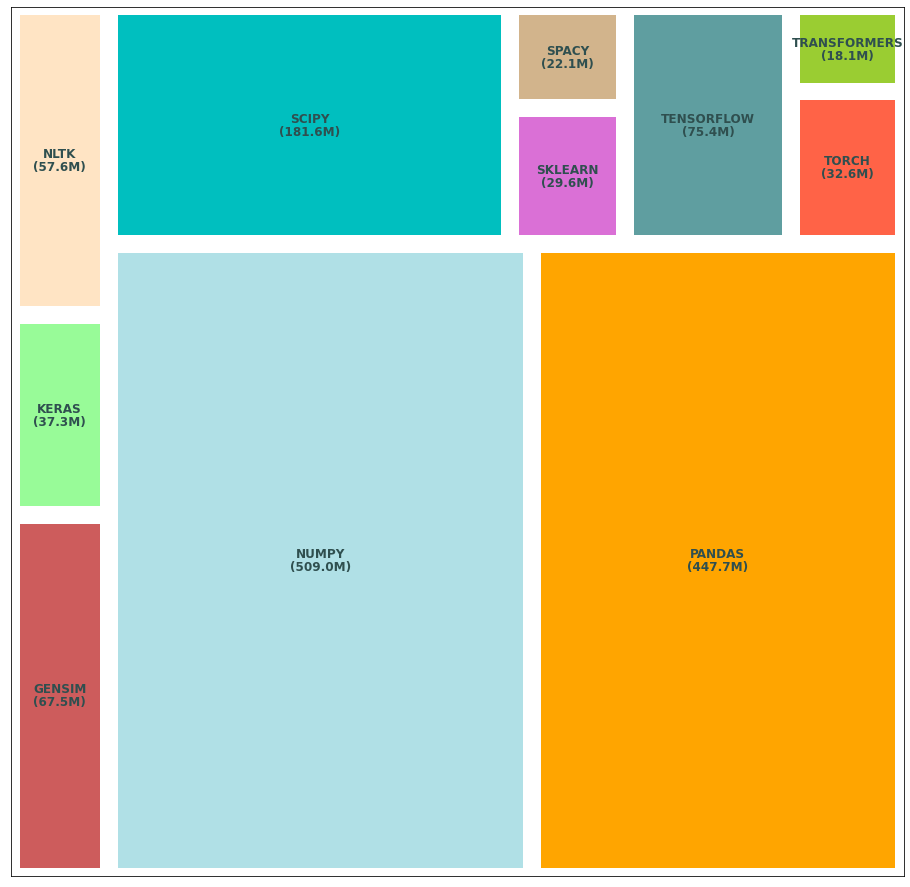

In [7]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

plt.figure(figsize=(16,16))
color = ['indianred', 'palegreen', 'bisque', 'powderblue', 'orange', 'c', 'orchid', 'tan', 'cadetblue', 'tomato', 'yellowgreen', 'teal']
plt.rcParams.update({'font.size': 16})
sum_mil = np.round(np.array(sums)/1000000,1).tolist()
squarify.plot(sums, color=color, label = [ n.upper() for n in names], value = [f"({v}M)" for v in sum_mil], pad=True, text_kwargs={'fontsize': 12, 'fontweight': 'bold', 'color':'darkslategrey'})
# plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

### Conclusion

- The above visuals clearly shows that 